# PyTorch ติดตั้งกับ gpu Nvidia

In [4]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128
!pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu128


Pytorch

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# เลือกใช้ gpu/cpu

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [7]:
torch.cuda.device_count()

1

# data

.to(device=device) ทำการย้าย ไปยัง gpu หรือคนไม่มี gpu มันจะอยู่ที่ cpu เหมือนเดิม

In [8]:
np.random.seed(1324)
X_np = np.random.rand(100, 1) * 100
y_np = 2 * X_np + 1 + np.random.randn(100, 1) * 10

X = torch.from_numpy(X_np).float().to(device=device)
y = torch.from_numpy(y_np).float().to(device=device)

ตอนนี้ ดาต้า X อยู่ที่ cuda ซึ่งเป็นตัวเรียก อยู่ใน gpu ของ Nvidia

index=0 หมายถึง gpuตัวที่ 0 ซึ่งผมมีตัวเดียว index ที่ 0 นั้นละครับ

In [9]:
X.device

device(type='cuda', index=0)

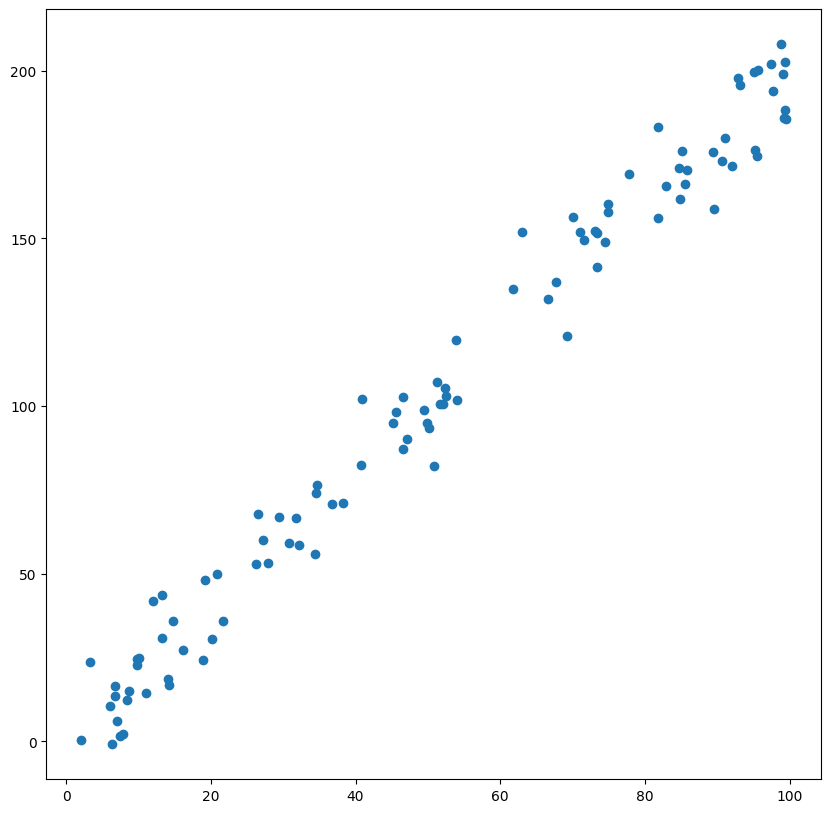

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(X.to("cpu"),y.to("cpu"))

จะเห็นว่า Linear_regression(nn.Module) nn.Module จาก pytorch

 Inheritance ( การสืบทอด ) ในเรื่อง python oop

และ nn.Linear(1,1) หมายถึง (1 อันแรกเข้า) 
(1 อันหลังออก)

ซึ่งหมายถึง x เข้า แล้ว เดา y เป็น ตัวเดียว

In [11]:
class Linear_regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1) 
    def forward(self,x):
        return self.linear(x)

In [12]:
model = Linear_regression().to(device=device)

nn.MSELoss() เรารู้ดีนี้คือ loss function

และ torch.optim.SGD(model.parameters(), lr=0.01) ก็ stochastic gradient descent

learning_rate = lr=0.01 

In [13]:
criterion = nn.MSELoss().to(device=device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

optimizer.zero_grad() ล้าง gradient เก่า 

loss.backward()  คำนวณ gradient จาก loss เราไม่ต้อง diff เองด้วย

optimizer.step() ใช้ gradient นั้นมาอัปเดตพารามิเตอร์

In [14]:
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X)
    # Compute loss
    loss = criterion(y_pred, y)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 27882.0488
Epoch 100, Loss: 91.1171
Epoch 200, Loss: 91.1097
Epoch 300, Loss: 91.1093
Epoch 400, Loss: 91.1089
Epoch 500, Loss: 91.1085
Epoch 600, Loss: 91.1081
Epoch 700, Loss: 91.1077
Epoch 800, Loss: 91.1074
Epoch 900, Loss: 91.1070


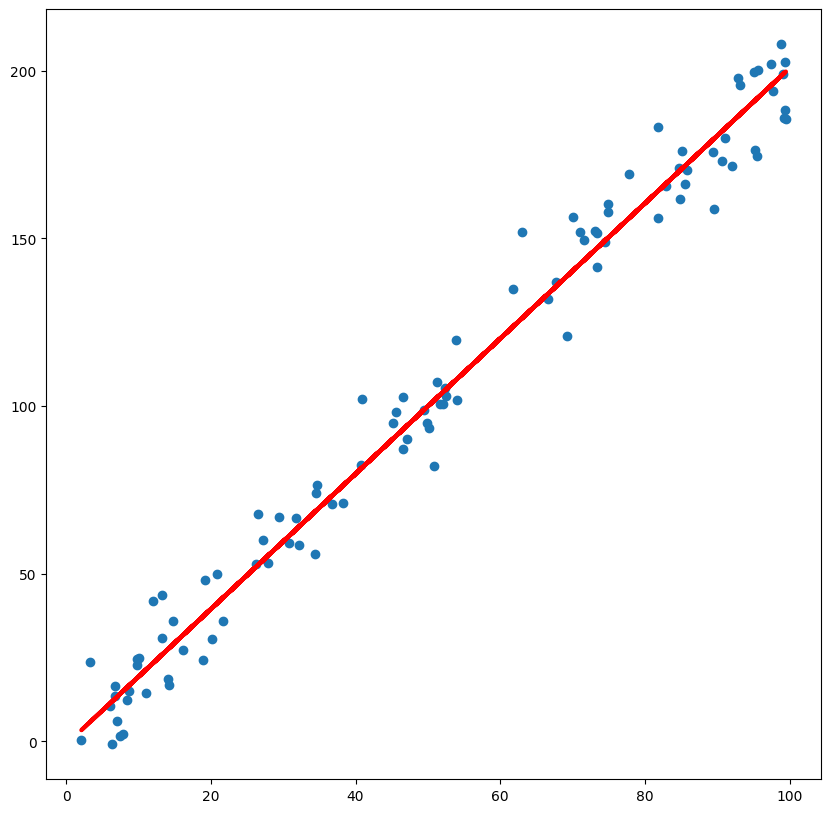

In [15]:
model.eval()
with torch.no_grad():
    y_hat = model(X)
plt.figure(figsize=(10,10))
plt.scatter(X.cpu(),y.cpu())
plt.plot(X.cpu(),y_hat.cpu(),color="red",linewidth=3)

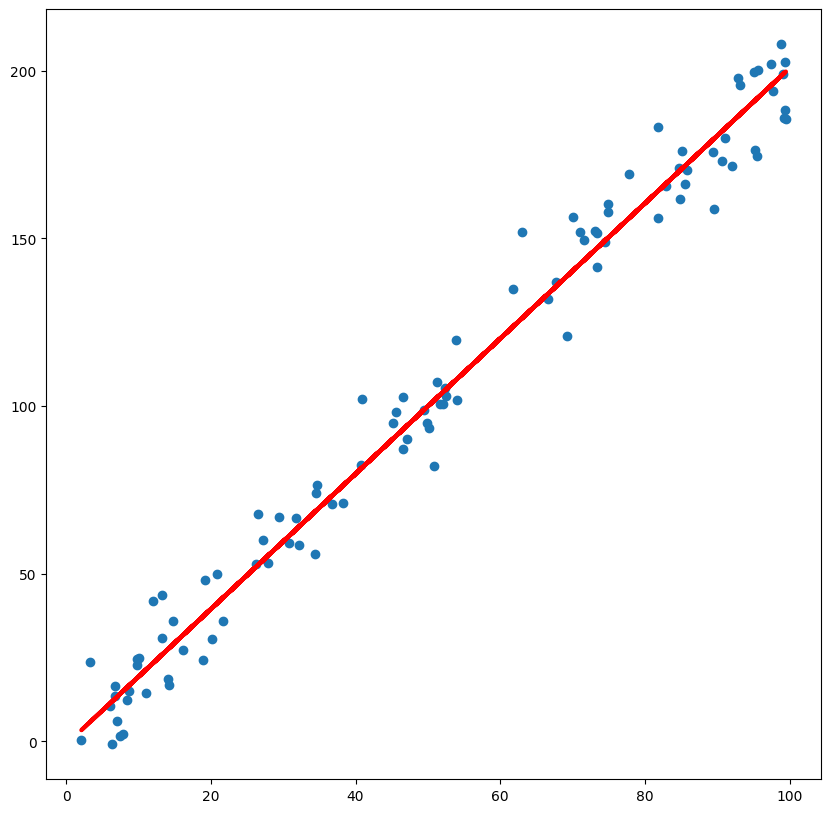

In [16]:
model.eval()
y_hat = model(X)
plt.figure(figsize=(10,10))
plt.scatter(X.cpu(),y.cpu())
plt.plot(X.cpu(),y_hat.detach().cpu(),color="red",linewidth=3)

# save

In [17]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss.item(),
}, "checkpoint")

# load พร้อม train อีกรอบได้

In [18]:
checkpoint = torch.load("checkpoint")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss_ = checkpoint['loss']